#### Handling Imbalanced Dataset with Machine Learning

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.isnull().count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

In [5]:
df.shape

(284807, 31)

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

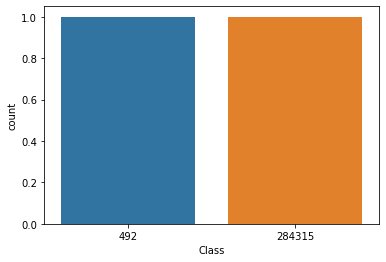

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['Class'].value_counts())
plt.show()

In [12]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
59580,48906.0,0.973032,-0.347965,1.286990,1.684915,-0.856348,0.788646,-0.657284,0.460148,1.107588,...,-0.345136,-0.653367,0.085062,0.196225,0.329256,-0.538955,0.077369,0.023021,35.80,0
148277,89656.0,-1.374601,-0.274606,1.614842,-0.319872,1.347160,-0.827177,1.386626,-0.726489,0.205009,...,-0.387500,-0.448989,0.121755,0.020619,0.651198,-0.441400,-0.724981,-0.495422,15.88,0
94806,65039.0,-0.403500,0.795439,0.989566,-0.097697,0.402970,0.143402,0.434546,0.040265,0.233704,...,0.147906,0.300481,-0.270795,-1.041385,-0.008632,-0.445384,-0.196878,0.045616,23.00,0
167746,118864.0,-0.190051,0.002527,0.282491,-2.104435,0.441644,-0.731041,0.646537,-0.235003,-0.746560,...,-0.327730,-0.945650,0.312375,0.496956,-0.452818,-0.850447,0.108175,-0.073597,69.99,0
102198,68085.0,1.059845,-0.146738,0.610755,1.556499,-0.711185,-0.455603,-0.081421,-0.018802,0.705081,...,-0.053711,-0.111814,-0.147683,0.368667,0.640224,-0.301375,0.020178,0.032326,73.83,0


### Independent and Dependent Features

In [13]:
X=df.drop("Class",axis=1)
y=df.Class

### Cross Validation Like KFOLD and Hyperpaqrameter Tuning

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

In [15]:
10.0 **np.arange(-2,3)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [16]:
log_class = LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv = KFold(n_splits=5,random_state=None,shuffle=False)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [18]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [28]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))

print("\n")

print("Accuracy of Model : ",accuracy_score(y_test,y_pred))

[[85264    38]
 [   62    79]]


Accuracy of Model :  0.9988296291094648


In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.68      0.56      0.61       141

    accuracy                           1.00     85443
   macro avg       0.84      0.78      0.81     85443
weighted avg       1.00      1.00      1.00     85443



In [45]:
347*100

34700

In [25]:
y_train.value_counts()

0    199013
1       351
Name: Class, dtype: int64

## Random Forest

In [26]:
class_weight=dict({0:1,1:100})

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(class_weight=class_weight)
classifier.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [30]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[85299     3]
 [   32   109]]
0.9995903701883126


In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.97      0.77      0.86       141

    accuracy                           1.00     85443
   macro avg       0.99      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



### Under Sampling

In [32]:
from collections import Counter
Counter(y_train)

Counter({0: 199013, 1: 351})

In [33]:
from collections import Counter
from imblearn.under_sampling import NearMiss

In [35]:
ns=NearMiss(0.8)
X_train_ns,y_train_ns=ns.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 199013, 1: 351})
The number of classes after fit Counter({0: 438, 1: 351})


In [36]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [37]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[67881 17421]
 [    7   134]]
0.7960277611975235
              precision    recall  f1-score   support

           0       1.00      0.80      0.89     85302
           1       0.01      0.95      0.02       141

    accuracy                           0.80     85443
   macro avg       0.50      0.87      0.45     85443
weighted avg       1.00      0.80      0.88     85443



### Over Sampling

In [38]:
from imblearn.over_sampling import RandomOverSampler

In [40]:
os=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 199013, 1: 351})
The number of classes after fit Counter({0: 199013, 1: 149259})


In [41]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [42]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85299     3]
 [   30   111]]
0.9996137776061234
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.97      0.79      0.87       141

    accuracy                           1.00     85443
   macro avg       0.99      0.89      0.94     85443
weighted avg       1.00      1.00      1.00     85443



### SMOTETomek

In [43]:
from imblearn.combine import SMOTETomek

In [48]:
os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 199013, 1: 351})
The number of classes after fit Counter({0: 198189, 1: 148435})


In [49]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [50]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85284    18]
 [   24   117]]
0.9995084442259752
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.87      0.83      0.85       141

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443



## Ensemble Techniques

In [51]:
from imblearn.ensemble import EasyEnsembleClassifier

In [58]:
easy=EasyEnsembleClassifier(n_estimators=25)
easy.fit(X_train_ns,y_train_ns)

EasyEnsembleClassifier(n_estimators=25)

In [59]:
y_pred=easy.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[84574   728]
 [   15   126]]
0.9913041442833234
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85302
           1       0.15      0.89      0.25       141

    accuracy                           0.99     85443
   macro avg       0.57      0.94      0.62     85443
weighted avg       1.00      0.99      0.99     85443

